<a href="https://colab.research.google.com/github/Jokerakos/Python_Projects/blob/master/billboard_wiki_scrape20years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Τελική Εργασία**

**ΕΔΔΕ2 "Ανάλυση Μεγάλων Δεδομένων μέσω της Γλώσσας Python"**





In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
def get_year_end_songs(year):
    """Επιστρέφει λίστες με λεξικά που περιλαμβάνει τίτλο, καλλιτέχνη και αριθμό στο top 100 που πήρε την αντίστοιχη χρονιά"""

    url = 'https://en.m.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_'+str(year)
    r = requests.get(url)
    bs = BeautifulSoup(r.text, 'lxml')
    rows = bs.find('table').find_all('tr')
    songs = []
    for row in rows[1:]:
        cols = row.find_all(['td', 'th'])
        cols = [t.text.strip().strip('"') for t in cols]
        song = {}
        try:
            song['number'] = cols[0]
        except:
            song['number'] = None
            
        try:
            song['title'] = cols[1]
        except:
            song['title'] = None
            
        try:
            song['artist'] = cols[2]
        except:
            song['artist'] = None
            
        
        song['year'] = year
        songs.append(song)
    return (songs)

In [3]:
all_songs = []
for year in range(2001, 2020):
    all_songs.extend(get_year_end_songs(year))

In [4]:
import pandas as pd

In [5]:
#Βάζω τα δεδομένα σε ένα dataframe
df = pd.DataFrame(all_songs)

In [6]:
df.head(150)

number                       title                            artist  year
0        1         Hanging by a Moment                         Lifehouse  2001
1        2                     Fallin'                       Alicia Keys  2001
2        3                 All for You                     Janet Jackson  2001
3        4  Drops of Jupiter (Tell Me)                             Train  2001
4        5     I'm Real (Murder Remix)  Jennifer Lopez featuring Ja Rule  2001
..     ...                         ...                               ...   ...
145     46    Superman (It's Not Easy)                 Five for Fighting  2002
146     47      Cleanin' Out My Closet                            Eminem  2002
147     48                   Halfcrazy                   Musiq Soulchild  2002
148     49     Lights, Camera, Action!                        Mr. Cheeks  2002
149     50                   Still Fly                        Big Tymers  2002

[150 rows x 4 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   number  1700 non-null   object
 1   title   1700 non-null   object
 2   artist  1700 non-null   object
 3   year    1700 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 53.2+ KB


# Το αρχείο kaggle.json μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1WTLQZqQuUZYsiUqNep9b390Zu0z_6PL4/view?usp=sharing)

In [8]:
!pip install -q kaggle
#Εδώ κάνετε import το json κλειδί που επισυνάπτω
from google.colab import files
files.upload()
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#Αλλαγή δικαιωμάτων του αρχείου

%matplotlib inline

Saving kaggle.json to kaggle.json


In [9]:
!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-160k-tracks

 53% 9.00M/16.9M [00:00<00:00, 14.4MB/s]
100% 16.9M/16.9M [00:00<00:00, 26.7MB/s]


In [10]:
!ls

kaggle.json  sample_data  spotify-dataset-19212020-160k-tracks.zip


In [11]:
!unzip \*.zip  && rm *.zip


Archive:  spotify-dataset-19212020-160k-tracks.zip
  inflating: data.csv                
  inflating: data_by_artist.csv      
  inflating: data_by_genres.csv      
  inflating: data_by_year.csv        
  inflating: data_w_genres.csv       
  inflating: super_genres.json       


In [12]:
#Βάζω το dataset σε ένα dataframe για καθάρισμα και σύγκριση
dfall = pd.read_csv("data.csv")

In [13]:
print(dfall.isnull().sum())

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64


In [14]:
#Διαγράφω όλες τις καταχωρήσεις από το 1928 μέχρι το 2009 ώστε να βρω τα δεδομένα που ζητάω
indexNames = dfall[ (dfall['release_date'] >= '1928') & (dfall['release_date'] <= '2001') ].index
dfall.drop(indexNames , inplace=True)

In [15]:
dfall

acousticness                              artists  ...  valence  year
6154          0.0177                   ['Living Legends']  ...    0.767  2001
6155          0.0291       ['Ja Rule', "Lil' Mo", 'Vita']  ...    0.715  2001
6156          0.0473                       ['Los Acosta']  ...    0.764  2001
6159          0.3630  ['Polo Urias Y Su Maquina Norteña']  ...    0.965  2001
6161          0.3270                    ['Grupo Bryndis']  ...    0.774  2001
...              ...                                  ...  ...      ...   ...
169904        0.1730               ['DripReport', 'Tyga']  ...    0.306  2020
169905        0.0167   ['Leon Bridges', 'Terrace Martin']  ...    0.270  2020
169906        0.5380                ['Kygo', 'Oh Wonder']  ...    0.153  2020
169907        0.0714        ['Cash Cash', 'Andy Grammer']  ...    0.472  2020
169908        0.1090                   ['Ingrid Andress']  ...    0.366  2020

[41662 rows x 19 columns]

In [16]:
#Διαγράφω τις κολώνες που δεν χρειάζομαι
dfall = dfall.drop(columns=['id', 'mode','liveness','explicit','energy','instrumentalness','speechiness'])

In [17]:
#Συγκρίνω το dataframe με όλα τα δεδομένα με το dataframe που έχει αυτά που ψάχνω και βάζω boolean τιμή True σε όσα ταιριάζουν
dfall['match'] = dfall['name'].isin(df['title'])


In [18]:
dfall

acousticness                              artists  ...  year  match
6154          0.0177                   ['Living Legends']  ...  2001  False
6155          0.0291       ['Ja Rule', "Lil' Mo", 'Vita']  ...  2001  False
6156          0.0473                       ['Los Acosta']  ...  2001  False
6159          0.3630  ['Polo Urias Y Su Maquina Norteña']  ...  2001  False
6161          0.3270                    ['Grupo Bryndis']  ...  2001  False
...              ...                                  ...  ...   ...    ...
169904        0.1730               ['DripReport', 'Tyga']  ...  2020  False
169905        0.0167   ['Leon Bridges', 'Terrace Martin']  ...  2020  False
169906        0.5380                ['Kygo', 'Oh Wonder']  ...  2020  False
169907        0.0714        ['Cash Cash', 'Andy Grammer']  ...  2020  False
169908        0.1090                   ['Ingrid Andress']  ...  2020  False

[41662 rows x 13 columns]

In [19]:
#Διαγράφω όλες τις τιμές που έχουν το match False
dfall = dfall.loc[dfall.match, :]
dfall = dfall.drop_duplicates(subset='name', keep="last")

In [20]:
dfall

acousticness                              artists  ...  year  match
6225         0.02400                         ['Röyksopp']  ...  2001   True
6416         0.38700                    ['Dave Matthews']  ...  2003   True
6464         0.10300                     ['Daddy Yankee']  ...  2004   True
7017         0.00098                   ['Kelly Clarkson']  ...  2009   True
7752         0.00381  ['Zay Hilfigerrr', 'Zayion McCall']  ...  2016   True
...              ...                                  ...  ...   ...    ...
169733       0.15600                        ['YNW Melly']  ...  2019   True
169739       0.18400          ['Boy In Space', 'unheard']  ...  2019   True
169750       0.05570                              ['AJR']  ...  2019   True
169853       0.09460                       ['Joel Corry']  ...  2020   True
169872       0.10600                        ['Sean Paul']  ...  2020   True

[1089 rows x 13 columns]

In [21]:
#Διαγράφω την κολώνα match μιας και πλέον έχω τα δεδομένα που χρειάζομαι
dfall = dfall.drop(columns=['match'])

In [22]:
#Καθαρίζω τις αγκύλες από τα ονόματα καλλιτεχνών
dfall['artists'] = dfall['artists'].str[2:]
dfall['artists'] = dfall['artists'].str.slice(0, -2)


In [23]:
dfall

acousticness                          artists  ...  valence  year
6225         0.02400                         Röyksopp  ...    0.852  2001
6416         0.38700                    Dave Matthews  ...    0.446  2003
6464         0.10300                     Daddy Yankee  ...    0.758  2004
7017         0.00098                   Kelly Clarkson  ...    0.350  2009
7752         0.00381  Zay Hilfigerrr', 'Zayion McCall  ...    0.780  2016
...              ...                              ...  ...      ...   ...
169733       0.15600                        YNW Melly  ...    0.442  2019
169739       0.18400          Boy In Space', 'unheard  ...    0.186  2019
169750       0.05570                              AJR  ...    0.212  2019
169853       0.09460                       Joel Corry  ...    0.722  2020
169872       0.10600                        Sean Paul  ...    0.822  2020

[1089 rows x 12 columns]

In [24]:
#Μετονομάζω την κολώνα name σε title γιατί το name παραπέμπει σε εντολή και δεν θα δουλέψουν οι παρακάτω εντολές
dfall.rename(columns={'name':'title'}, inplace=True)

In [25]:
pip install PyLyrics


  Created wheel for PyLyrics: filename=PyLyrics-1.1.0-cp36-none-any.whl size=3578 sha256=6ecc979af7821e67b7c978aefb7df8da838d5b21699d5f342e42330a8c5ac76b
  Stored in directory: /root/.cache/pip/wheels/75/41/30/3aaf00a1c51003972eec70fb44fe9384586fab06e241aa706d
Successfully built PyLyrics


In [26]:
#Κάνω Import την βιβλιοθήκη PyLyrics και δοκιμάζω για κάθε στοιχείο του dataframe να κατεβάσω τους στίχους του
from PyLyrics import PyLyrics
from pprint import pprint
from pandas import read_csv

for index, row in dfall.iterrows():
  print('Getting lyrics for', row.artists, row.title)
  try:
    lyrics = PyLyrics.getLyrics(row.artists, row.title)
  except:
    lyrics = None
    print('Failed to get lyrics for', row.artists, row.title)
  dfall.loc[index, 'Lyrics'] = lyrics

pprint(dfall)

Getting lyrics for Röyksopp Remind Me


/usr/local/lib/python3.6/dist-packages/PyLyrics/functions.py:78: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 78 of the file /usr/local/lib/python3.6/dist-packages/PyLyrics/functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  s = BeautifulSoup(r.text)


Getting lyrics for Dave Matthews Oh
Getting lyrics for Daddy Yankee Like You
Getting lyrics for Kelly Clarkson I Do Not Hook Up
Getting lyrics for Zay Hilfigerrr', 'Zayion McCall Juju on That Beat (TZ Anthem)
Failed to get lyrics for Zay Hilfigerrr', 'Zayion McCall Juju on That Beat (TZ Anthem)
Getting lyrics for Teddy Geiger For You I Will (Confidence)
Getting lyrics for Ronan Keating This I Promise You
Getting lyrics for Baby Boy', 'Boosie Badazz The Way I Live
Failed to get lyrics for Baby Boy', 'Boosie Badazz The Way I Live
Getting lyrics for Local Natives Airplanes
Getting lyrics for Josh Abbott Band Taste
Failed to get lyrics for Josh Abbott Band Taste
Getting lyrics for Ross Lynch', 'Spencer Lee', 'Maia Mitchell', 'Grace Phipps', 'Garrett Clayton Meant to Be
Failed to get lyrics for Ross Lynch', 'Spencer Lee', 'Maia Mitchell', 'Grace Phipps', 'Garrett Clayton Meant to Be
Getting lyrics for OutKast Ms. Jackson
Getting lyrics for Brandy What About Us?
Getting lyrics for Jewel Intu

In [27]:
print(dfall.isnull().sum())

acousticness      0
artists           0
danceability      0
duration_ms       0
key               0
loudness          0
title             0
popularity        0
release_date      0
tempo             0
valence           0
year              0
Lyrics          297
dtype: int64


In [28]:
#Διαγράφω όποιες καταχωρήσεις δεν έχουν στίχους
dfall = dfall.dropna()

In [29]:
#Καθαρίζω τους στίχους από την εντολή new line
dfall = dfall.replace(r'\n',' ', regex=True) 

In [30]:
dfall

acousticness  ...                                             Lyrics
6225         0.02400  ...  It's only been a week The rush of being home i...
6416         0.38700  ...  The world is blowing up The world is caving in...
6464         0.10300  ...  Yo!   Its your boy!   Daddy Yankee! All my Lat...
7017         0.00098  ...  Oh, sweetheart, put the bottle down You've got...
14751        0.00410  ...  Wandering the streets in a world underneath it...
...              ...  ...                                                ...
169592       0.00430  ...  Yo, yo Pi'erre you wanna come out here? Metro!...
169597       0.04380  ...  Grind hard, nigga, grind hard, I done grind ha...
169637       0.80500  ...  I saw you standing there Sandy blonde hair, th...
169727       0.00112  ...  Thought I saw your shadow under the door Just ...
169872       0.10600  ...  The gal dem Schillaci, Sean da Paul So me give...

[792 rows x 13 columns]

In [31]:
#Κάνω sort ανά το popularity ώστε να βγάλω έναν πίνακα με τα πιο δημοφιλή τραγούδια των τελευταίων 10 ετών με βάση τον δείκτη Popularity του Spoptify API
dfall.sort_values('popularity', ascending = False, inplace = True)
dfall = dfall.reset_index(drop=True)
print(dfall.head(10))

   acousticness  ...                                             Lyrics
0       0.34900  ...  Nick Mira on the mix No, no, no, no No no no, ...
1       0.06220  ...  First things first I'mma say all the words ins...
2       0.32800  ...  Man, what? (Haha) This shit funny I was like O...
3       0.04270  ...  We go together Better than birds of a feather,...
4       0.06910  ...  Oh, she's sweet but a psycho A little bit psyc...
5       0.33100  ...  You probably think that you are better now, be...
6       0.92200  ...  What would I do without your smart mouth Drawi...
7       0.03320  ...  Yeah they wishin' and wishin' and wishin' and ...
8       0.00264  ...  Are you all right? I'm all right, I'm quite al...
9       0.06890  ...  Ooh I fall apart Ooh yeah...  She told me that...

[10 rows x 13 columns]


In [33]:
#Κάνω import την βιβλιλοθήκη Counter και μετράω τις φορές που εμφανίστηκε ο κάθε Καλλιτέχνης στο dataframe 
from collections import Counter 
print(Counter(dfall['artists'].values))

Counter({'Drake': 14, 'Taylor Swift': 10, 'Beyoncé': 10, 'Britney Spears': 9, 'Kelly Clarkson': 9, 'Black Eyed Peas': 9, 'Nickelback': 8, 'Eminem': 8, 'Rihanna': 8, 'P!nk': 8, 'One Direction': 7, 'Maroon 5': 7, 'Fall Out Boy': 7, 'Bruno Mars': 6, 'Alicia Keys': 6, 'Coldplay': 6, 'Avril Lavigne': 6, 'Usher': 6, 'Kenny Chesney': 6, 'Ed Sheeran': 5, 'John Mayer': 5, 'Jason Derulo': 5, 'Carrie Underwood': 5, 'T.I.': 5, 'Chris Brown': 5, 'Katy Perry': 5, 'Lady Gaga': 5, 'Sean Paul': 5, "Destiny's Child": 5, 'Shawn Mendes': 4, 'Miley Cyrus': 4, 'Ne-Yo': 4, 'Linkin Park': 4, 'Jason Aldean': 4, 'The All-American Rejects': 4, 'Sean Kingston': 4, 'Ludacris': 4, 'Gavin DeGraw': 4, 'Daughtry': 4, 'Post Malone': 3, 'NF': 3, 'Justin Bieber': 3, 'The Fray': 3, 'Ariana Grande': 3, 'Zac Brown Band': 3, 'Natasha Bedingfield': 3, 'Playboi Carti': 3, 'Green Day': 3, 'Shakira': 3, '3 Doors Down': 3, 'Demi Lovato': 3, 'Florida Georgia Line': 3, 'Rae Sremmurd': 3, 'Kesha': 3, 'Sia': 3, 'Meghan Trainor': 3, '

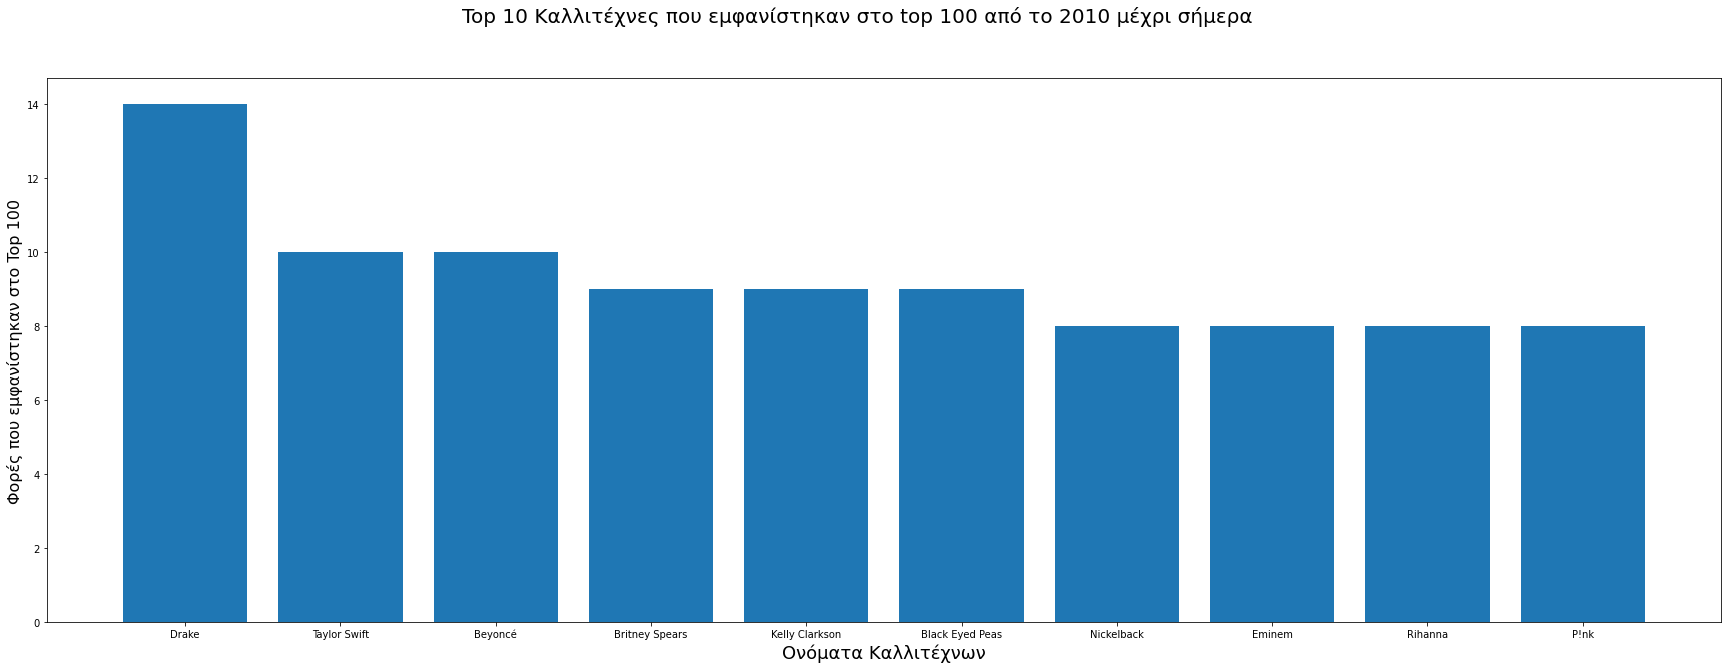

In [34]:
#Κάνω διάγραμμα με τους top 10 καλλιτέχνες
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,10),facecolor='w') 
fig.suptitle('Top 10 Καλλιτέχνες που εμφανίστηκαν στο top 100 από το 2000 μέχρι σήμερα', fontsize=20)
plt.xlabel('Ονόματα Καλλιτέχνων', fontsize=18)
plt.ylabel('Φορές που εμφανίστηκαν στο Top 100', fontsize=16)
#ax.imshow(X, cmap=cm.jet)

bar_plot = dict(Counter(dfall['artists'].values).most_common(10))

plt.bar(*zip(*bar_plot.items()))
plt.show()

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [36]:
#Κάνω import την βιβλιοθήκη stopwords και καθαρίζω κάποιες λέξεις που εμφανίστηκαν κατά λάθος
stopwords = set(STOPWORDS)
stopwords.update(["oh", "ooh", "ha", "yeah"])


lyricd = " ".join(lyr for lyr in dfall.Lyrics)

In [37]:
def remov_duplicates(input): 
  
    # split input string separated by space 
    input = input.split(" ") 
  
    # joins two adjacent elements in iterable way 
    for i in range(0, len(input)): 
        input[i] = "".join(input[i]) 
  
    # now create dictionary using counter method 
    # which will have strings as key and their  
    # frequencies as value 
    UniqW = Counter(input) 
  
    # joins two adjacent elements in iterable way 
    s = " ".join(UniqW.keys()) 
    print (s) 
  
# Driver program 
if __name__ == "__main__": 
    input = lyricd
    remov_duplicates(input) 

Nick Mira on the mix No, no, no No (no)  I still see your shadows in my room Can't take back love that gave you It's to point where and hate And cannot change you, so must replace oh Easier said than done thought were one Listenin' heart instead of head You found another But am better won't let forget me left falling landing inside grave know want dead prescriptions make feel a-okay it's all have these lucid dreams can't move a thing Thinking bed everything Thoughts wedding ring Now I'm just off I'll do it over again didn't end watch blow wind should've listened friends Did this shit past last made outta plastic, fake was tangled up drastic ways Who knew evil girls had prettiest face? full mistakes break ache (I room) (can't you) (were fake) ways) but were... ...Instead another... ...Better First things first I'mma say words fired tired way been, oh-ooh The Second second Don't tell what think can be at sail, master sea, broken from young age Taking sulking masses Write down poems for f

In [38]:
#Με regex καθαρίζω τo string που περιλαμβάνει όλους τους στίχους, διαγράφοντας σημεία στίξης, μετατρέποντας όλα τα γράμματα σε lowercase και αφαιρώ όποια λέξη είναι κάτω από 3 γράμματα
import re

lyricd = re.sub(r'[^\w]', ' ', lyricd)
shortword = re.compile(r'\W*\b\w{1,3}\b')
lyricd = shortword.sub('', lyricd)
lyricd = lyricd.lower()

In [39]:
lyricd

'nick mira still your shadows room take back love that gave point where love hate cannot change must replace easier said than done thought were listenin heart instead head found another better forget still your shadows room take back love that gave point where love hate cannot change must replace easier said than done thought were listenin heart instead head found another better forget left falling landing inside grave know that want dead take prescriptions make feel okay know head have these lucid dreams where move thing thinking were everything thoughts wedding ring just better dead over again didn want watch blow wind should listened friends this shit past want last were made outta plastic  fake tangled your drastic ways knew evil girls prettiest face gave heart that full mistakes gave heart made heart break made heart break made heart ache still your shadows room made heart break made heart ache take back love that gave made heart break  were made outta plastic  fake made heart ach

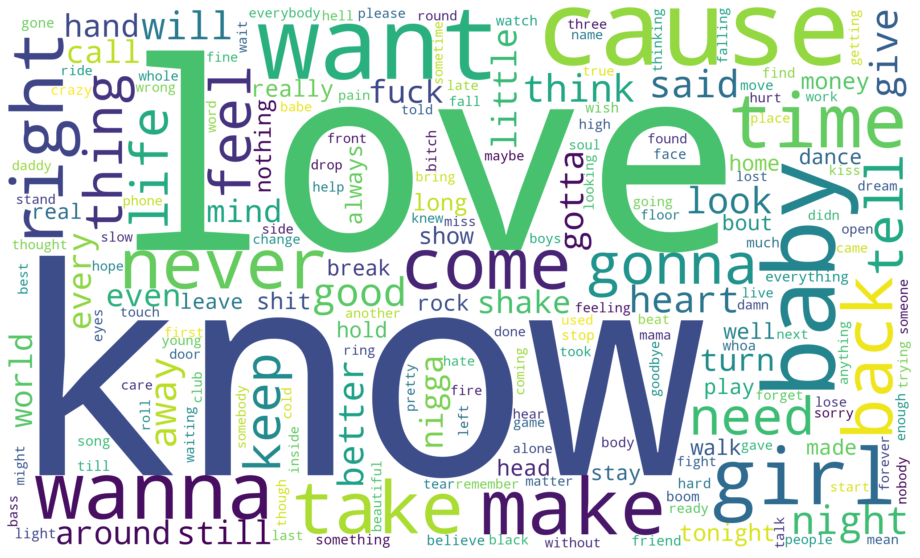

In [41]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=2500, height=1500, collocations = False).generate(lyricd)
fig = plt.figure(figsize=(30,10),facecolor='w') 

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()


In [42]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

All frequencies, without STOPWORDS:
       Frequency
Word            
like        2377
know        2200
love        1863
yeah        1517
cause       1361
baby        1210
want        1163
make        1001
right        958
time         918
take         917
girl         915
never        906
back         865
come         819
could        622
life         619
tell         617
feel         616
need         613


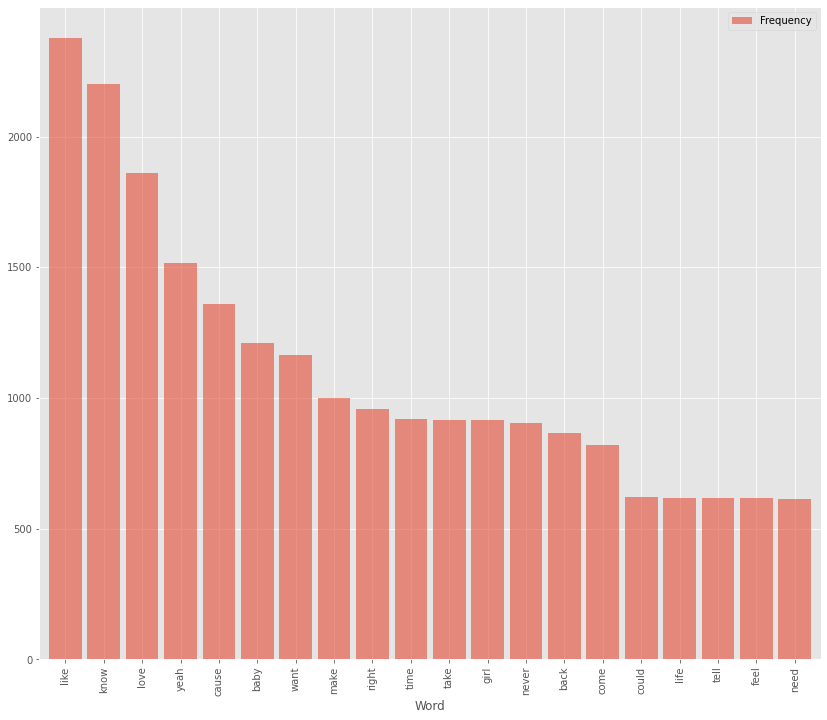

In [43]:
#Κάνω import την βιβλιοθήκη nltk και δημιουργώ διάγραμμα με την συχνότητα που εμφανίζονται λέξεις στους στίχους
from nltk.corpus import stopwords

top_N = 20

words = nltk.tokenize.word_tokenize(lyricd)
words = [w for w in words if len(w) > 3]  # ignore a, an, be, ...
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 


print('All frequencies, without STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N), columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
print('=' * 60)

plt.style.use('ggplot')

rslt.plot.bar(width=0.85, alpha=0.6, figsize=(14,12))

In [44]:
#Εδώ δημιουργώ δύο backup dataframe με τα index Και το release date γιατί αργότερα μου δημιούργησε πρόβλημα η συχνή εναλλαγή τους.
backupd = dfall[['release_date']].copy()

backupd = pd.to_datetime(backupd['release_date'], format='%Y-%m-%d')

backupd

#Αυτό για το resample
rsbacka = dfall[['release_date']].copy()

rsbacka['popularity'] = dfall['popularity']
rsbacka['danceability'] = dfall['danceability']
rsbacka['tempo'] = dfall['tempo']
rsbacka['loudness'] = dfall['loudness']

rsbacka['release_date'] = pd.to_datetime(rsbacka['release_date'], format='%Y-%m-%d' )
rsbacka = rsbacka.set_index('release_date')

rsbacka

popularity  danceability    tempo  loudness
release_date                                             
2018-12-10            89         0.511   83.903    -7.230
2017-06-23            87         0.776  124.949    -4.374
2019-03-08            86         0.685  159.966    -5.122
2019-06-07            85         0.842  137.958    -5.065
2018-08-17            85         0.719  133.002    -4.724
...                  ...           ...      ...       ...
2003-01-01            37         0.276  205.576    -3.507
2020-06-04            27         0.753   91.972    -7.621
2020-06-12             1         0.951  125.040    -4.675
2020-06-12             0         0.603  128.000    -5.969
2020-06-05             0         0.651  102.001    -5.564

[792 rows x 4 columns]

CPU times: user 197 ms, sys: 7.03 ms, total: 204 ms
Wall time: 203 ms


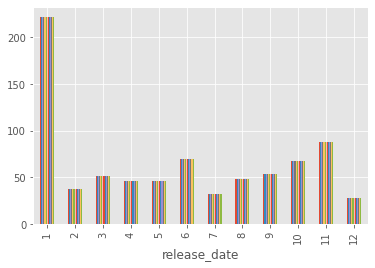

In [45]:
%%time
dfall['release_date'] = pd.to_datetime(dfall['release_date'], format='%Y-%m-%d')

dfall.groupby(dfall["release_date"].dt.month).count().plot(kind="bar", legend = False)


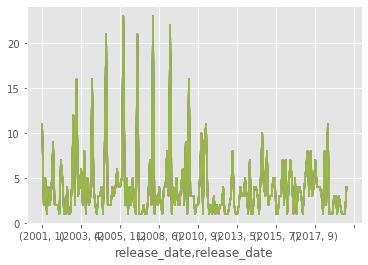

In [46]:
dfall.groupby([dfall['release_date'].dt.year, dfall['release_date'].dt.month]).count().plot(kind="line", legend = False)

In [47]:
dfall.dtypes

acousticness           float64
artists                 object
danceability           float64
duration_ms              int64
key                      int64
loudness               float64
title                   object
popularity               int64
release_date    datetime64[ns]
tempo                  float64
valence                float64
year                     int64
Lyrics                  object
dtype: object

In [48]:
dfall

acousticness  ...                                             Lyrics
0        0.349000  ...  Nick Mira on the mix No, no, no, no No no no, ...
1        0.062200  ...  First things first I'mma say all the words ins...
2        0.328000  ...  Man, what? (Haha) This shit funny I was like O...
3        0.042700  ...  We go together Better than birds of a feather,...
4        0.069100  ...  Oh, she's sweet but a psycho A little bit psyc...
..            ...  ...                                                ...
787      0.053100  ...  Unfortunately, we are not licensed to display ...
788      0.534000  ...  To be young and in love in New York City To no...
789      0.106000  ...  The gal dem Schillaci, Sean da Paul So me give...
790      0.000128  ...  I gotta feeling That tonight's gonna be a good...
791      0.218000  ...  Beauty queen of only eighteen She had some tro...

[792 rows x 13 columns]

In [49]:
rsbacka['popularity'].resample('A').mean()

release_date
2001-12-31    58.711111
2002-12-31    58.394737
2003-12-31    55.580000
2004-12-31    57.880952
2005-12-31    60.491228
2006-12-31    59.200000
2007-12-31    58.600000
2008-12-31    59.709091
2009-12-31    60.066667
2010-12-31    61.717391
2011-12-31    63.117647
2012-12-31    57.687500
2013-12-31    63.939394
2014-12-31    64.511628
2015-12-31    69.232558
2016-12-31    70.071429
2017-12-31    73.192308
2018-12-31    75.128205
2019-12-31    75.857143
2020-12-31    18.400000
Freq: A-DEC, Name: popularity, dtype: float64

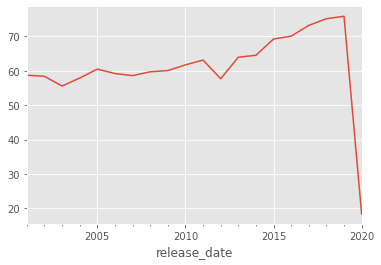

In [50]:
rsbacka['popularity'].resample('A').mean().plot() 


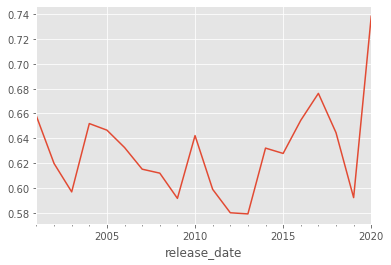

In [51]:
rsbacka['danceability'].resample('A').mean().plot() 

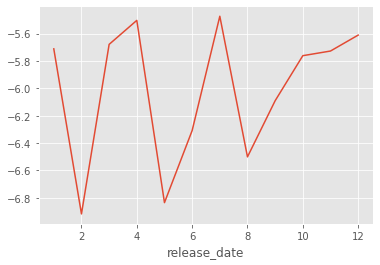

In [52]:
dfall['loudness'].groupby(by=dfall['release_date'].dt.month).mean().plot() 
#spring break και καλοκαίρι

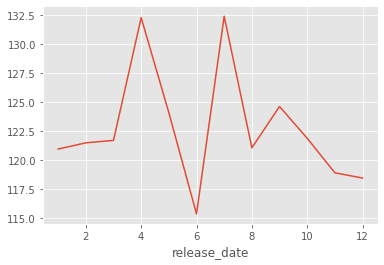

In [53]:
dfall['tempo'].groupby(by=dfall['release_date'].dt.month).mean().plot() 


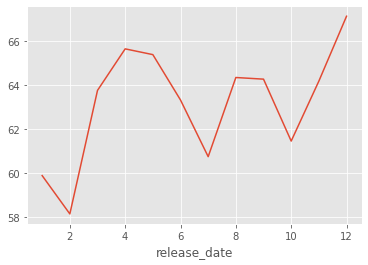

In [54]:
dfall['popularity'].groupby(by=dfall['release_date'].dt.month).mean().plot() 


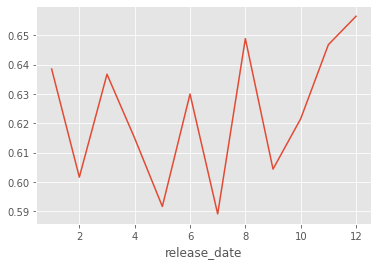

In [55]:
dfall['danceability'].groupby(by=dfall['release_date'].dt.month).mean().plot() 


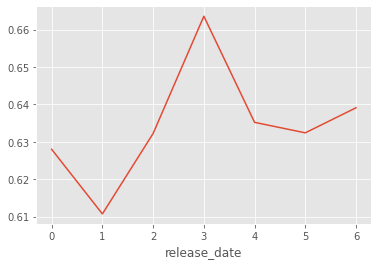

In [56]:
dfall['danceability'].groupby(by=dfall['release_date'].dt.dayofweek).mean().plot() 


In [57]:
import string
def clean_text(Lyrics):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", Lyrics.lower())
    return re.sub(r'\W+', ' ', clean1)

In [58]:
dfall['tokenized'] = dfall['Lyrics'].map(lambda x: clean_text(x))

In [59]:
dfall.Lyrics = [str (item) for item in dfall['Lyrics']]

In [60]:
dfall['tokenized'] = dfall['Lyrics'].map(lambda x: clean_text(x))

In [61]:
dfall['num_wds'] = dfall['tokenized'].apply(lambda x: len(x.split()))
dfall['num_wds'].mean()

384.6906565656566

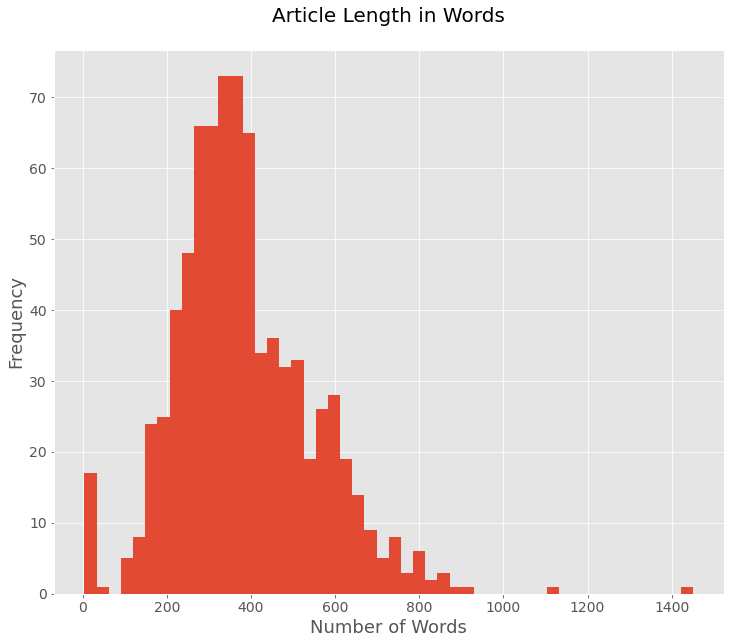

In [62]:
ax=dfall['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [63]:
dfall['uniq_wds'] = dfall['tokenized'].str.split().apply(lambda x: len(set(x)))
dfall['uniq_wds'].head()

0    122
1    133
2    137
3     83
4    102
Name: uniq_wds, dtype: int64

In [64]:
dfall['uniq_wds'].mean()

120.47853535353535

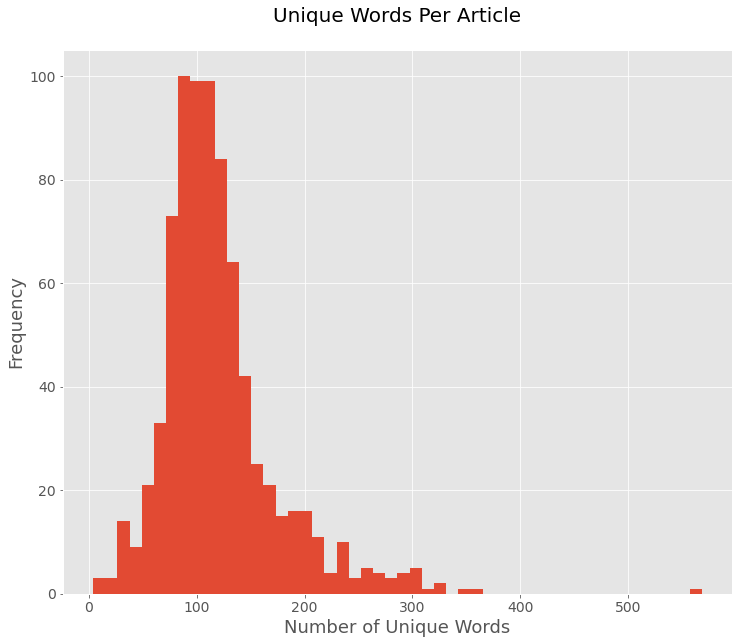

In [65]:
ax=dfall['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

In [66]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
dfall['tokenized'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0      nick mira on the mix no no no no no no no no n...
1      first thing first imma say all the word insid ...
2      man what haha thi shit funni i wa like oof thi...
3      we go togeth better than bird of a feather you...
4      oh she sweet but a psycho a littl bit psycho a...
                             ...                        
787    unfortun we are not licens to display the full...
788    to be young and in love in new york citi to no...
789    the gal dem schillaci sean da paul so me give ...
790    i gotta feel that tonight gonna be a good nigh...
791    beauti queen of onli eighteen she had some tro...
Name: tokenized, Length: 792, dtype: object

In [69]:
from textblob import Word
nltk.download('wordnet')
dfall['lemmatized'] = dfall['tokenized'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dfall['lemmatized'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    nick mira on the mix no no no no no no no no n...
1    first thing first imma say all the word inside...
2    man what haha this shit funny i wa like oof th...
3    we go together better than bird of a feather y...
4    oh shes sweet but a psycho a little bit psycho...
Name: lemmatized, dtype: object

In [70]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [71]:
dfall

acousticness  ...                                         lemmatized
0        0.349000  ...  nick mira on the mix no no no no no no no no n...
1        0.062200  ...  first thing first imma say all the word inside...
2        0.328000  ...  man what haha this shit funny i wa like oof th...
3        0.042700  ...  we go together better than bird of a feather y...
4        0.069100  ...  oh shes sweet but a psycho a little bit psycho...
..            ...  ...                                                ...
787      0.053100  ...  unfortunately we are not licensed to display t...
788      0.534000  ...  to be young and in love in new york city to no...
789      0.106000  ...  the gal dem schillaci sean da paul so me give ...
790      0.000128  ...  i gotta feeling that tonight gonna be a good n...
791      0.218000  ...  beauty queen of only eighteen she had some tro...

[792 rows x 17 columns]

In [72]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

for i in range(dfall.shape[0]): 
    dfall.loc[i, "polarity"] = abs(sid.polarity_scores(dfall.loc[i, 'lemmatized'])['compound'])
    dfall.loc[i, "negativity"] = abs(sid.polarity_scores(dfall.loc[i, 'lemmatized'])['neg'])
    dfall.loc[i, "neutrality"] = abs(sid.polarity_scores(dfall.loc[i, 'lemmatized'])['neu'])
    dfall.loc[i, "positivity"] = abs(sid.polarity_scores(dfall.loc[i, 'lemmatized'])['pos'])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [73]:
for i in range(dfall.shape[0]): 
    dfall.loc[i, "title_polarity"] = abs(sid.polarity_scores(dfall.loc[i, "title"])['compound'])

In [74]:
dfall

acousticness          artists  ...  positivity  title_polarity
0        0.349000       Juice WRLD  ...       0.175          0.4019
1        0.062200  Imagine Dragons  ...       0.094          0.0000
2        0.328000       Juice WRLD  ...       0.143          0.0000
3        0.042700   Jonas Brothers  ...       0.097          0.5267
4        0.069100          Ava Max  ...       0.261          0.2500
..            ...              ...  ...         ...             ...
787      0.053100         Lonestar  ...       0.079          0.0000
788      0.534000             Lauv  ...       0.363          0.6597
789      0.106000        Sean Paul  ...       0.168          0.0000
790      0.000128  Black Eyed Peas  ...       0.238          0.1280
791      0.218000         Maroon 5  ...       0.248          0.5994

[792 rows x 22 columns]

In [75]:

filepath = "https://raw.githubusercontent.com/sebastianruder/emotion_proposition_store/master/NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head(20)

emotion          word  anger  anticipation  ...  sadness  surprise  trust
0                 NaN    0.0           0.0  ...      0.0       0.0    0.0
1              abacus    NaN           NaN  ...      0.0       0.0    1.0
2             abandon    0.0           0.0  ...      1.0       0.0    0.0
3           abandoned    1.0           0.0  ...      1.0       0.0    0.0
4         abandonment    1.0           0.0  ...      1.0       1.0    0.0
5               abate    0.0           0.0  ...      0.0       0.0    0.0
6           abatement    0.0           0.0  ...      0.0       0.0    0.0
7                abba    0.0           0.0  ...      0.0       0.0    0.0
8               abbot    0.0           0.0  ...      0.0       0.0    1.0
9          abbreviate    0.0           0.0  ...      0.0       0.0    0.0
10       abbreviation    0.0           0.0  ...      0.0       0.0    0.0
11            abdomen    0.0           0.0  ...      0.0       0.0    0.0
12          abdominal    0.0           0.0  ...      0.0       0.0    0.0
13          abduction    0.0           0.0  ...      1.0       1.0    0.0
14           aberrant    0.0           0.0  ...      0.0       0.0    0.0
15         aberration    0.0           0.0  ...      0.0       0.0    0.0
16           abeyance    0.0           0.0  ...      0.0       0.0    0.0
17              abhor    1.0           0.0  ...      0.0       0.0    0.0
18          abhorrent    1.0           0.0  ...      0.0       0.0    0.0
19              abide    0.0           0.0  ...      0.0       0.0    0.0

[20 rows x 11 columns]

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm= None ) #'l1') # ELL - ONE
matrix = vec.fit_transform(dfall['lemmatized'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

NaN  abacus  abandon  abandoned  ...  zoo  zoological  zoology  zoom
0  0.0     0.0      0.0        0.0  ...  0.0         0.0      0.0   0.0
1  0.0     0.0      0.0        0.0  ...  0.0         0.0      0.0   0.0
2  0.0     0.0      0.0        0.0  ...  0.0         0.0      0.0   0.0
3  0.0     0.0      0.0        0.0  ...  0.0         0.0      0.0   0.0
4  0.0     0.0      0.0        0.0  ...  0.0         0.0      0.0   0.0

[5 rows x 14181 columns]

In [77]:
# Get your list of positive words

angry_words = emolex_df[emolex_df.anger == 1]['word']

positive_words = emolex_df[emolex_df.positive == 1]['word']

# Get your list of sadness words
sadness_words = emolex_df[emolex_df.sadness == 1]['word']

# Get your list of surprise words
surprise_words = emolex_df[emolex_df.surprise == 1]['word']

# Get your list of disgust words
disgust_words = emolex_df[emolex_df.disgust == 1]['word']

# Get your list of anticipation words
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']

# Get your list of negative words
negative_words = emolex_df[emolex_df.negative == 1]['word']

# Get your list of joy words
joy_words = emolex_df[emolex_df.joy == 1]['word']

# Get your list of trust words
trust_words = emolex_df[emolex_df.trust == 1]['word']

# Get your list of fear words
fear_words = emolex_df[emolex_df.fear == 1]['word']


In [78]:
dfall['anger'] = (wordcount_df[angry_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['joy'] = (wordcount_df[joy_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['disgust'] = (wordcount_df[disgust_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['surprise'] = (wordcount_df[surprise_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['trust'] = (wordcount_df[trust_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['anticipation'] = (wordcount_df[anticipation_words].sum(axis=1) / dfall['uniq_wds']) *10

dfall['sadness'] = (wordcount_df[sadness_words].sum(axis=1) / dfall['uniq_wds']) *100

dfall['fear'] = (wordcount_df[fear_words].sum(axis=1) / dfall['uniq_wds']) *100

In [79]:
dfall

acousticness          artists  ...    sadness       fear
0        0.349000       Juice WRLD  ...  11.475410  11.475410
1        0.062200  Imagine Dragons  ...  18.045113  18.045113
2        0.328000       Juice WRLD  ...  20.437956  19.708029
3        0.042700   Jonas Brothers  ...  15.662651  13.253012
4        0.069100          Ava Max  ...  11.764706  18.627451
..            ...              ...  ...        ...        ...
787      0.053100         Lonestar  ...   0.000000   0.000000
788      0.534000             Lauv  ...   1.123596   1.123596
789      0.106000        Sean Paul  ...   4.430380   3.164557
790      0.000128  Black Eyed Peas  ...  10.185185  14.814815
791      0.218000         Maroon 5  ...   5.000000   5.000000

[792 rows x 30 columns]

In [80]:
dfall['release_date'] = pd.to_datetime(dfall['release_date'] )
dfall = dfall.set_index('release_date')


In [81]:
dfall

acousticness          artists  ...    sadness       fear
release_date                                 ...                      
2018-12-10        0.349000       Juice WRLD  ...  11.475410  11.475410
2017-06-23        0.062200  Imagine Dragons  ...  18.045113  18.045113
2019-03-08        0.328000       Juice WRLD  ...  20.437956  19.708029
2019-06-07        0.042700   Jonas Brothers  ...  15.662651  13.253012
2018-08-17        0.069100          Ava Max  ...  11.764706  18.627451
...                    ...              ...  ...        ...        ...
2003-01-01        0.053100         Lonestar  ...   0.000000   0.000000
2020-06-04        0.534000             Lauv  ...   1.123596   1.123596
2020-06-12        0.106000        Sean Paul  ...   4.430380   3.164557
2020-06-12        0.000128  Black Eyed Peas  ...  10.185185  14.814815
2020-06-05        0.218000         Maroon 5  ...   5.000000   5.000000

[792 rows x 29 columns]

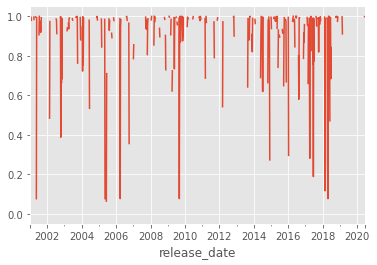

In [82]:
dfall['polarity'].resample('W').mean().plot()

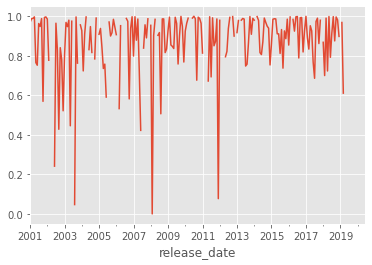

In [83]:
dfall['polarity'].resample('M').mean().plot()


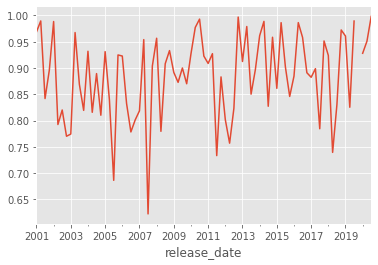

In [84]:
dfall['polarity'].resample('3M').mean().plot()

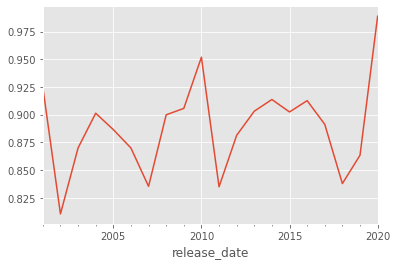

In [85]:
dfall['polarity'].resample('A').mean().plot()

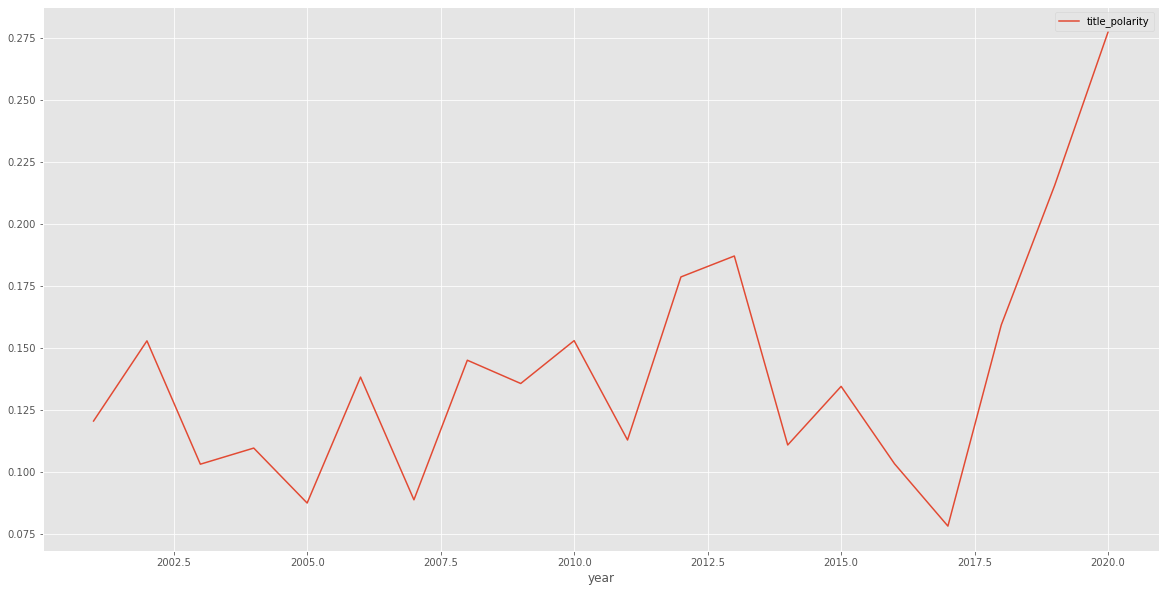

In [86]:
ax = dfall.groupby('year')['title_polarity'].mean().plot(legend = True, figsize=(20, 10))


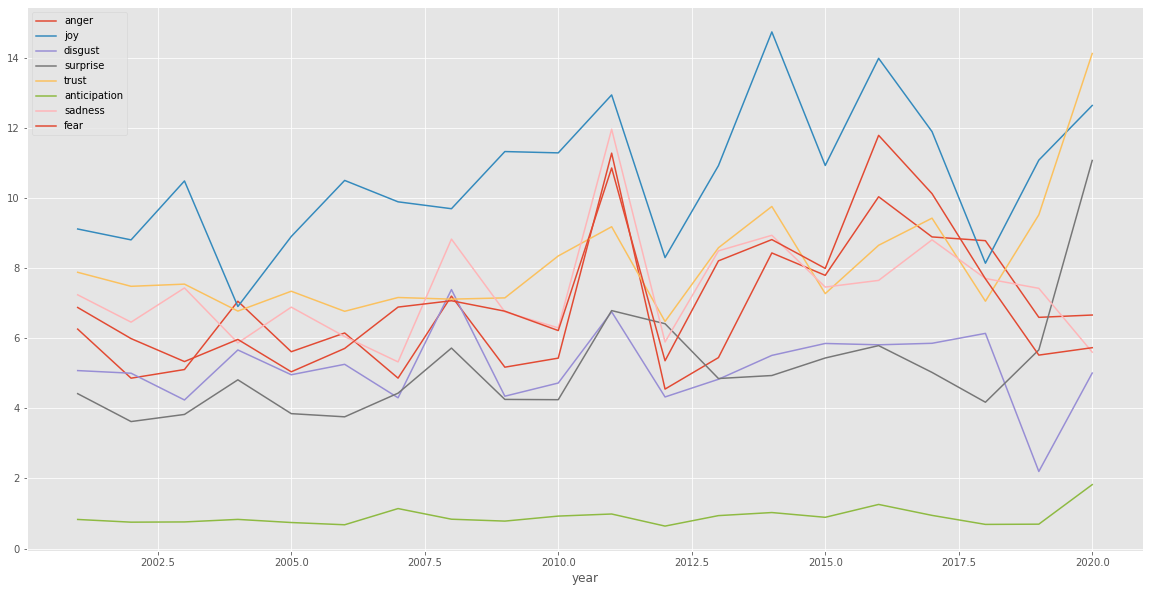

In [87]:
ax = dfall.groupby('year')['anger'].mean().plot(legend = True, figsize=(20, 10))
dfall.groupby('year')['joy'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['disgust'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['surprise'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['trust'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['anticipation'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['sadness'].mean().plot(ax=ax, legend = True)
dfall.groupby('year')['fear'].mean().plot(ax=ax, legend = True)



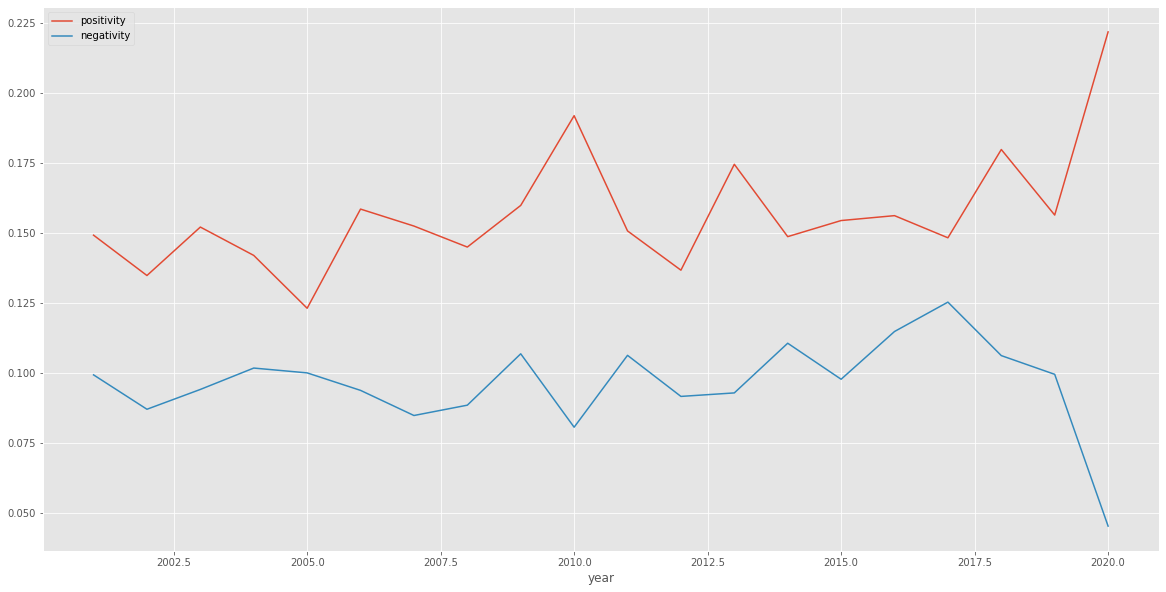

In [88]:
ax = dfall.groupby('year')['positivity'].mean().plot(legend = True, figsize=(20, 10))
dfall.groupby('year')['negativity'].mean().plot(ax=ax, legend = True)


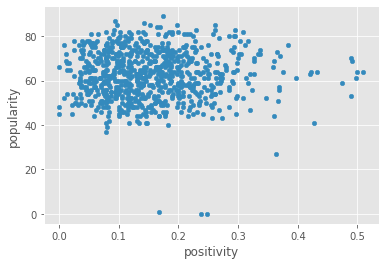

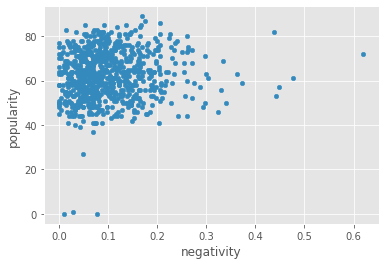

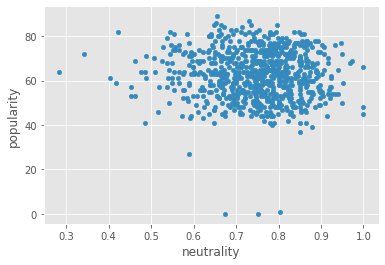

In [89]:
dfall.plot(x='positivity', y='popularity', kind='scatter')
dfall.plot(x='negativity', y='popularity', kind='scatter')
dfall.plot(x='neutrality', y='popularity', kind='scatter')


12. Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της
ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που
έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου
heatmap **PENDING**

In [90]:
import spacy

In [91]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [92]:
nlp = spacy.load('en_core_web_sm')

In [93]:
list(nlp.Defaults.stop_words)[0:20]

['they',
 'twenty',
 'have',
 'next',
 'serious',
 'thence',
 'together',
 '’ll',
 'it',
 'bottom',
 'therefore',
 "'s",
 '’m',
 'empty',
 'off',
 'not',
 'several',
 'nobody',
 'us',
 'towards']

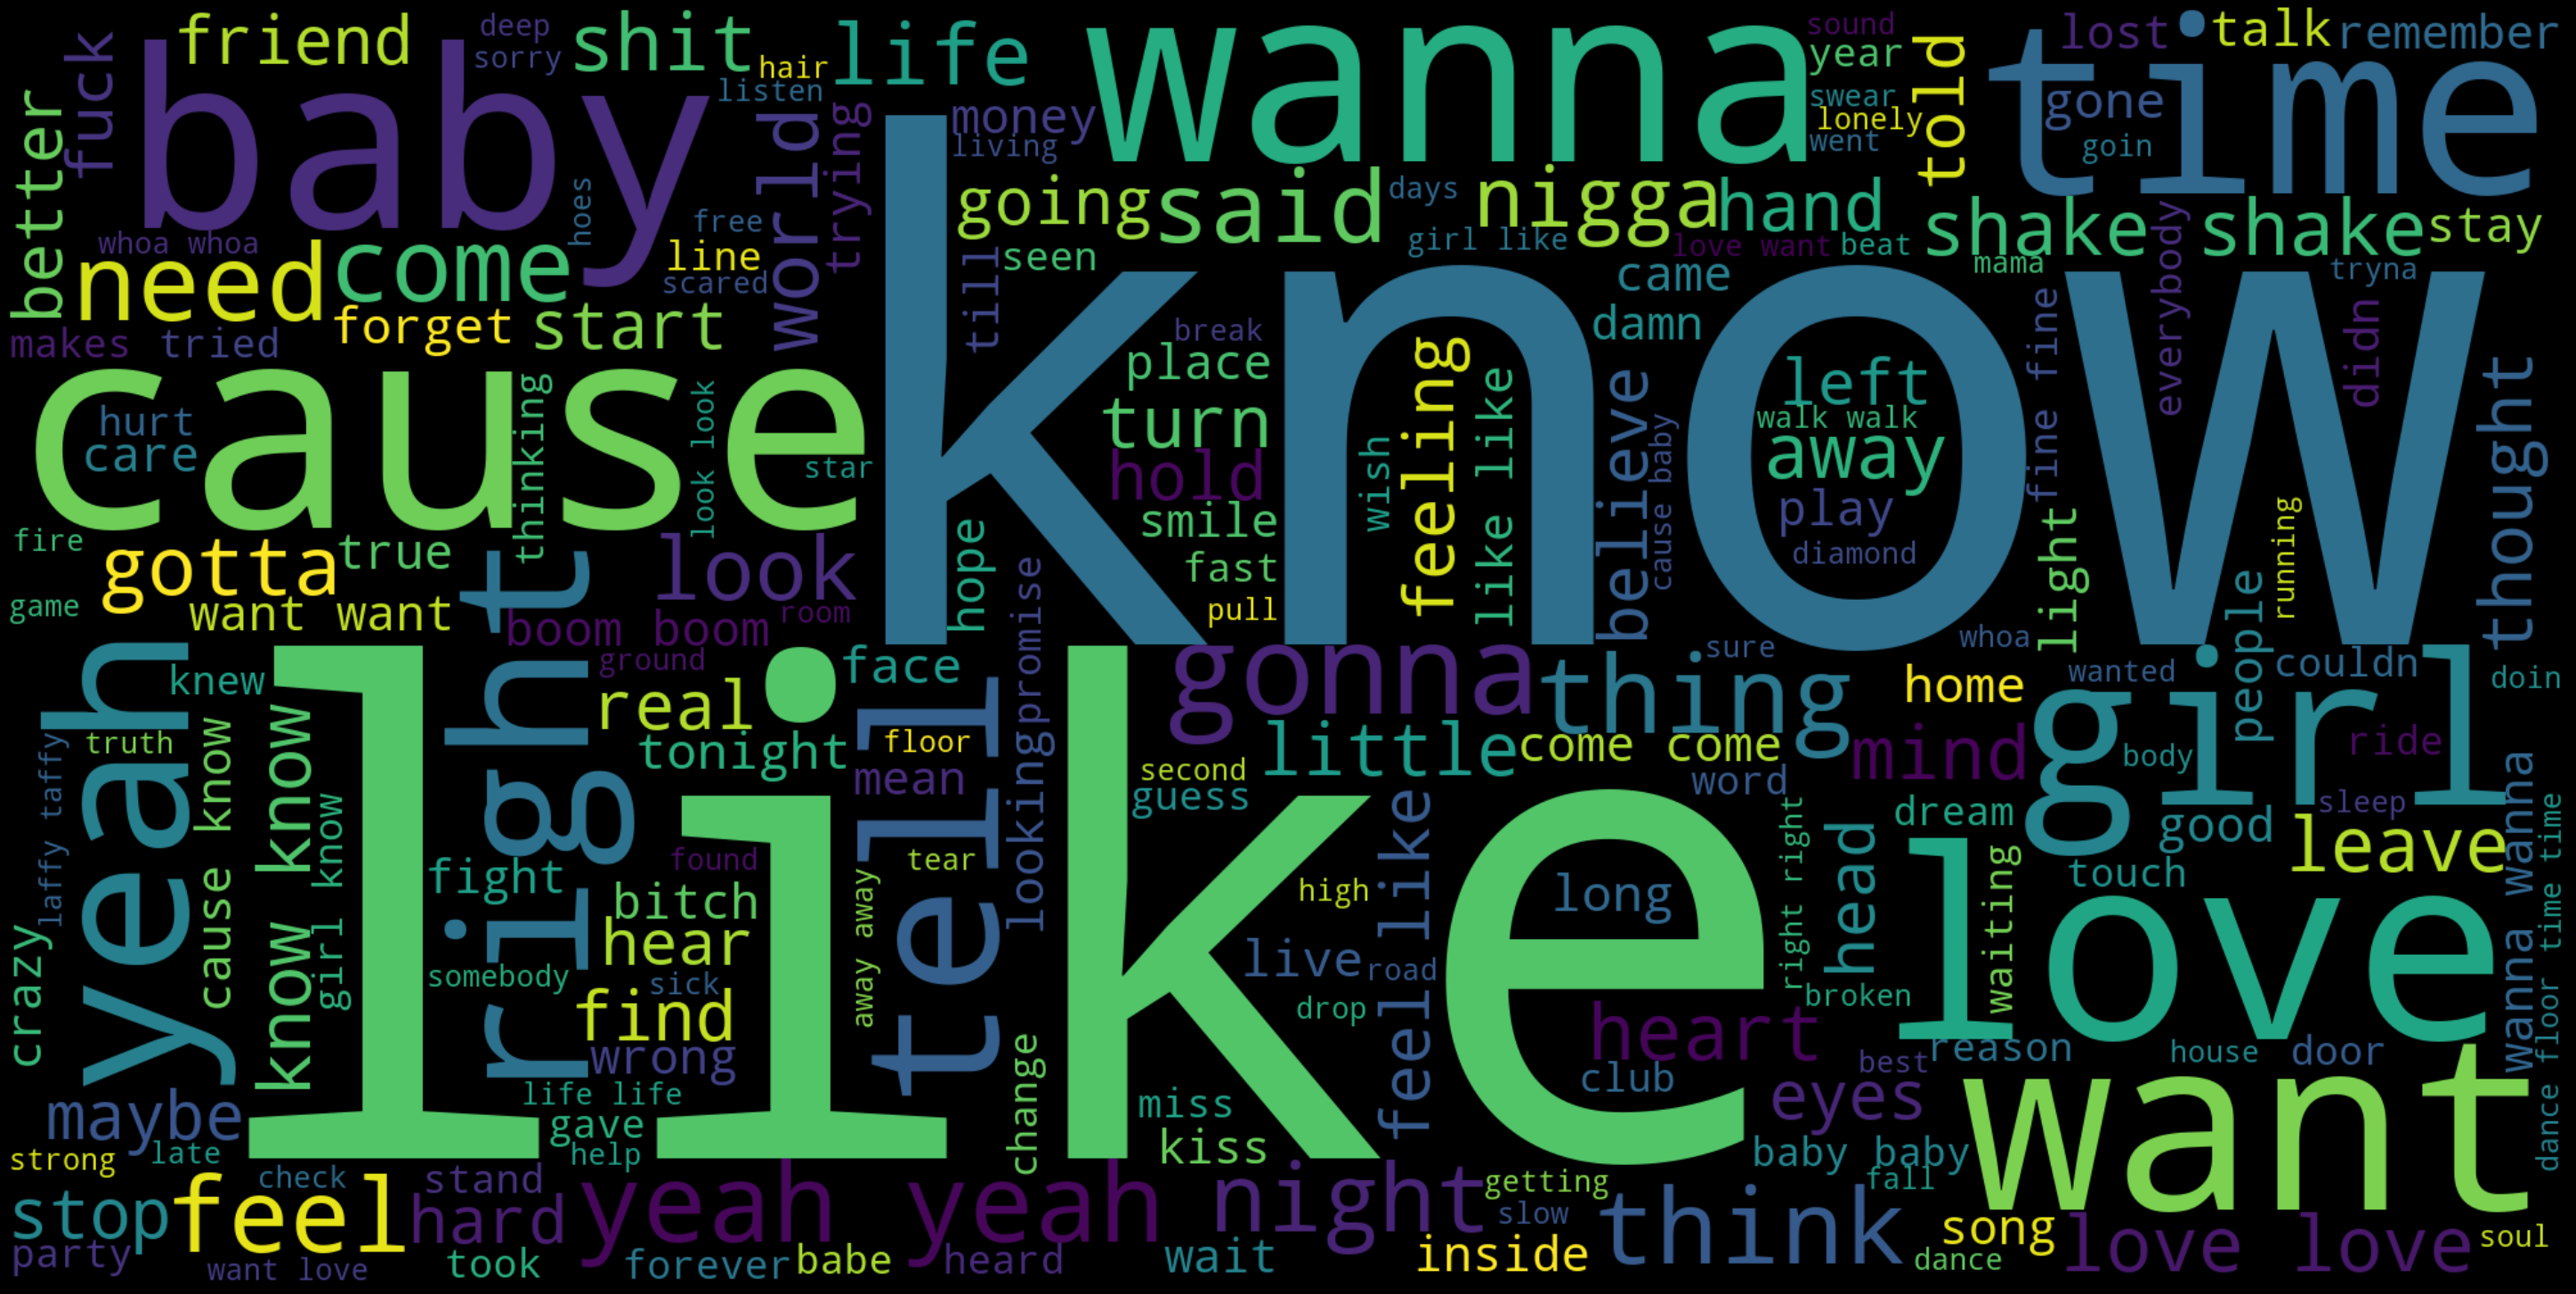

In [94]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(lyricd)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [96]:
count_vector = cv.fit_transform(dfall['Lyrics'])

In [97]:
count_vector.shape

(792, 9379)

In [98]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

00  000  00am  02  03  10  ...  zone  zoo  zoom  zuleyma  ça  último
0   0    0     0   0   0   0  ...     0    0     0        0   0       0
1   0    0     0   0   0   0  ...     0    0     0        0   0       0
2   0    0     0   0   0   0  ...     0    0     0        0   0       0
3   0    0     0   0   0   0  ...     0    0     0        0   0       0
4   0    0     0   0   0   0  ...     0    0     0        0   0       0

[5 rows x 9379 columns]

In [99]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [100]:
count_vector = cv.fit_transform(dfall['Lyrics'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [101]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

10  20  30  able  act  actin  ...  years  yes  yesterday  yo  york  young
0   0   0   0     0    0      0  ...      0    0          0   0     0      0
1   0   0   0     0    0      0  ...      0    0          0   0     0      1
2   0   0   0     0    0      0  ...      0    0          0   0     0      0
3   0   0   0     0    0      0  ...      0    0          0   0     0      0
4   0   0   0     0    0      0  ...      0    6          0   0     0      0

[5 rows x 1237 columns]

In [102]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [103]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfall['Lyrics'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-PRON-', 'regard', 'use'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


...  able  act  actin  admit  adore  ...  year  yell  yes  yesterday  york  young
0    4     0    0      0      0      0  ...     0     0    0          0     0      0
1    0     0    0      0      0      0  ...     0     0    0          0     0      1
2    0     0    0      0      0      0  ...     0     0    0          0     0      0
3    0     0    0      0      0      0  ...     0     0    0          0     0      0
4    0     0    0      0      0      0  ...     0     0    6          0     0      0

[5 rows x 1030 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

like        1153
know        1065
love         981
yeah         941
want         639
            ... 
prize          4
wide           4
heel           4
spark          4
distance       4
Length: 989, dtype: int64

In [104]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   

know    2511
like    2395
love    2119
yeah    1517
want    1372
dtype: int64

In [105]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bcov[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfall['Lyrics'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

cover  covered  covers
0      0        0       0
1      0        0       0
2      0        0       0
3      0        0       0
4      0        0       0

In [106]:
from sklearn.metrics.pairwise import cosine_similarity
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(dfall['Lyrics'])  #finds the tfidf score with normalization
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [107]:
dfall = dfall.set_index(backupd.index)

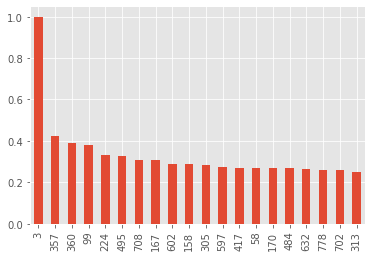

In [118]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')